In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 3263.4611496591174, RMSE: 57.12671134993784


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.6007
Iteration  200 | Loss = 64.7303
Iteration  300 | Loss = 64.5162
Iteration  400 | Loss = 64.4518
Iteration  500 | Loss = 64.4319
Iteration  600 | Loss = 64.4257
Iteration  700 | Loss = 64.4238
Iteration  800 | Loss = 64.4232
Iteration  900 | Loss = 64.4230
Iteration 1000 | Loss = 64.4229
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2121.928917022206, RMSE: 46.064399670702386
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 58.5129
Iteration  200 | Loss = 56.8986
Iteration  300 | Loss = 56.5183
Iteration  400 | Loss = 56.4085
Iteration  500 | Loss = 56.3750
Iteration  600 | Loss = 56.3645
Iteration  700 | Loss = 56.3612
Iteration  800 | Loss = 56.3601
Iteration  900 | Loss = 56.3597
Iteration 1000 | Loss = 56.3596
Fitting

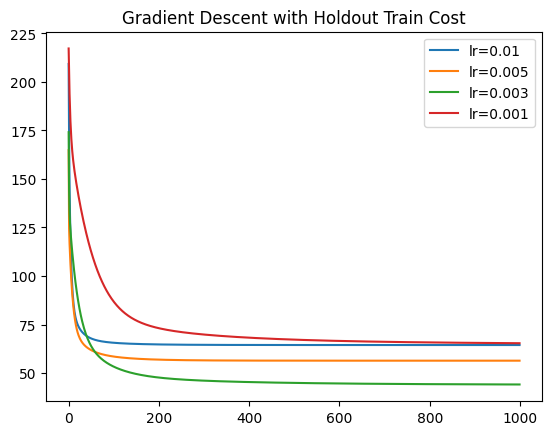

In [9]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [10]:
print(gd_hld_opt_model)

{'rmse': 46.064399670702386, 'lr': 0.01, 'w': array([-59.52866889,  74.53868023, 513.19959727, 375.09051133,
       142.67686035, -47.05689605, 309.76664588])}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 64.2152
Iteration  200 | Loss = 63.6451
Iteration  300 | Loss = 63.4930
Iteration  400 | Loss = 63.4429
Iteration  500 | Loss = 63.4260
Iteration  600 | Loss = 63.4202
Iteration  700 | Loss = 63.4182
Iteration  800 | Loss = 63.4175
Iteration  900 | Loss = 63.4172
Iteration 1000 | Loss = 63.4171
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2423.7126663807016, RMSE: 49.23121638128294
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.5589
Iteration  200 | Loss = 63.6322
Iteration  300 | Loss = 63.1366
Iteration  400 | Loss = 62.9223
Iteration  500 | Loss = 62.8124
Iteration  600 | Loss = 62.7523
Iteration  700 | Loss = 62.7185
Iteration  800 | Loss = 62.6992
Iteration  900 | Loss = 62.6881
Iteration 1000 | Loss = 62.68

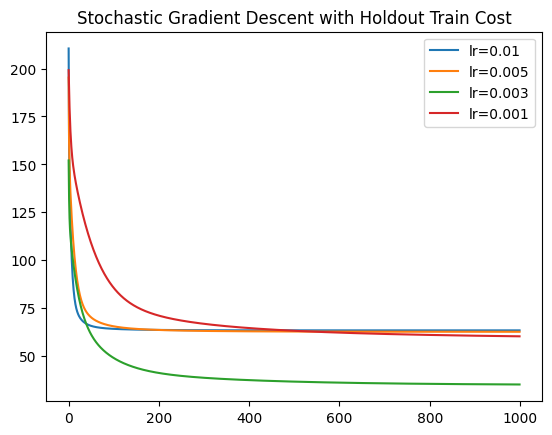

In [12]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [13]:
print(sgd_hld_opt_model)

{'rmse': 49.23121638128294, 'lr': 0.01, 'w': array([-62.63657012,  64.57653465, 488.34987901, 394.75069157,
       154.36738546,  15.62268319, 254.26147046])}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 60.7345
Iteration  200 | Loss = 60.1248
Iteration  300 | Loss = 60.0363
Iteration  400 | Loss = 60.0224
Iteration  500 | Loss = 60.0202
Iteration  600 | Loss = 60.0198
Iteration  700 | Loss = 60.0198
Iteration  800 | Loss = 60.0198
Iteration  900 | Loss = 60.0198
Iteration 1000 | Loss = 60.0198
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3949.8980374414077, RMSE: 62.84821427408585
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 47.4546
Iteration  200 | Loss = 46.1091
Iteration  300 | Loss = 45.7005
Iteration  400 | Loss = 45.5728
Iteration  500 | Loss = 45.5330
Iteration  600 | Loss = 45.5206
Iteration  700 | Loss = 45.5167
Iteration  800 | Loss = 45.5155
Iteration  900 | Loss = 45.5151
Iteration 1000 | Loss = 45.5150
Fitt

In [15]:
print(gd_montc_opt_model)

{'rmse': 66.4533922996391, 'lr': 0.005, 'w': array([-54.48414028,  58.12422831, 528.7327084 , 352.96485118,
       148.94142231, -22.7616668 , 302.20524995])}


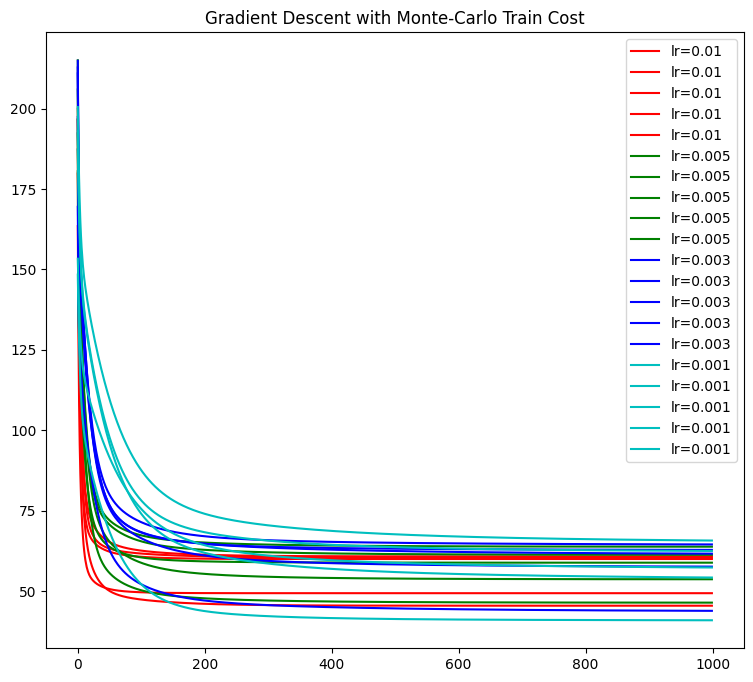

In [16]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 55.1736
Iteration  200 | Loss = 54.4996
Iteration  300 | Loss = 54.4395
Iteration  400 | Loss = 54.4337
Iteration  500 | Loss = 54.4331
Iteration  600 | Loss = 54.4330
Iteration  700 | Loss = 54.4330
Iteration  800 | Loss = 54.4330
Iteration  900 | Loss = 54.4330
Iteration 1000 | Loss = 54.4330
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5717.283579490692, RMSE: 75.6127210163124
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.6805
Iteration  200 | Loss = 62.7180
Iteration  300 | Loss = 62.4591
Iteration  400 | Loss = 62.3762
Iteration  500 | Loss = 62.3488
Iteration  600 | Loss = 62.3397
Iteration  700 | Loss = 62.3367
Iteration  800 | Loss = 62.3357
Iteration  900 | Loss = 62.3354
Iteration 1000 | Loss = 62.3

In [18]:
print(sgd_montc_opt_model)

{'rmse': 62.37035375445553, 'lr': 0.01, 'w': array([-46.39147804,  60.7376733 , 561.58245214, 267.71892618,
       155.64366696,  72.16751956, 212.79526718])}


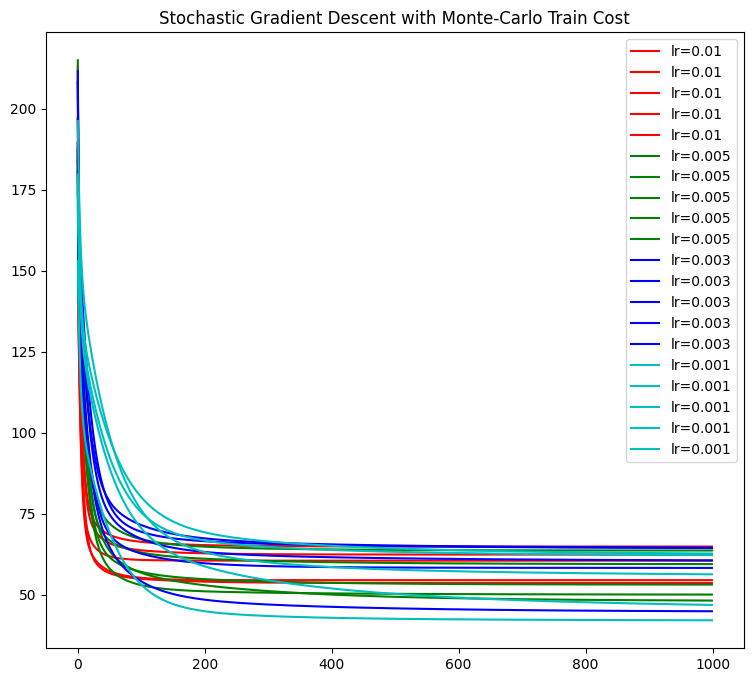

In [19]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.2780
Iteration  200 | Loss = 61.5216
Iteration  300 | Loss = 61.3073
Iteration  400 | Loss = 61.2419
Iteration  500 | Loss = 61.2215
Iteration  600 | Loss = 61.2152
Iteration  700 | Loss = 61.2132
Iteration  800 | Loss = 61.2126
Iteration  900 | Loss = 61.2124
Iteration 1000 | Loss = 61.2124
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2286.650272588332, RMSE: 47.818932156504
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 63.5561
Iteration  200 | Loss = 63.0148
Iteration  300 | Loss = 62.8985
Iteration  400 | Loss = 62.8684
Iteration  500 | Loss = 62.8604
Iteration  600 | Loss = 62.8583
Iteration  700 | Loss = 62.8577
Iteration  800 | Loss = 62.8576
Iteration  900 | Loss = 62.8575
Iteration 1000 | Loss = 62.8575
Fitting comp

In [21]:
print(gd_kfold_opt_model)

{'rmse': 62.84552423907047, 'lr': 0.005, 'w': array([-59.06142591,  83.46122952, 444.24020753, 408.87468644,
       164.35241703, -13.17338747, 254.60831419])}


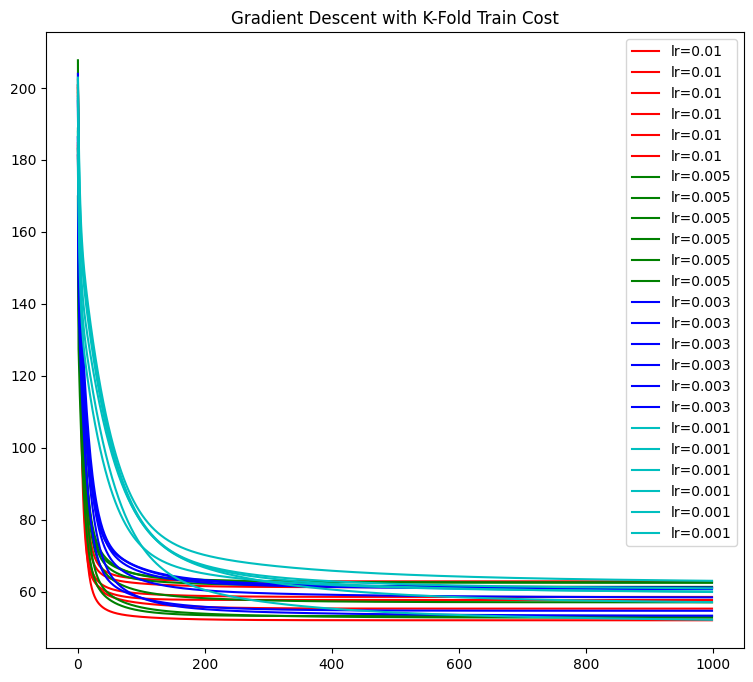

In [22]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_kfold_train_costs)):
    for j in range(len(gd_kfold_train_costs[i])):
        plt.plot(gd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 58.7379
Iteration  200 | Loss = 58.4371
Iteration  300 | Loss = 58.4105
Iteration  400 | Loss = 58.4068
Iteration  500 | Loss = 58.4060
Iteration  600 | Loss = 58.4057
Iteration  700 | Loss = 58.4056
Iteration  800 | Loss = 58.4055
Iteration  900 | Loss = 58.4055
Iteration 1000 | Loss = 58.4055
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5023.1168451692565, RMSE: 70.87395039906592
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.4537
Iteration  200 | Loss = 60.8321
Iteration  300 | Loss = 60.7180
Iteration  400 | Loss = 60.6963
Iteration  500 | Loss = 60.6942
Iteration  600 | Loss = 60.6955
Iteration  700 | Loss = 60.6968
Iteration  800 | Loss = 60.6976
Iteration  900 | Loss = 60.6980
Iteration 1000 | Loss = 60.6983

In [24]:
print(sgd_kfold_opt_model)

{'rmse': 63.581580722534916, 'lr': 0.005, 'w': array([-54.64599632,  76.72103811, 522.1014139 , 353.51639163,
       137.98825802, -15.3122467 , 264.66005043])}


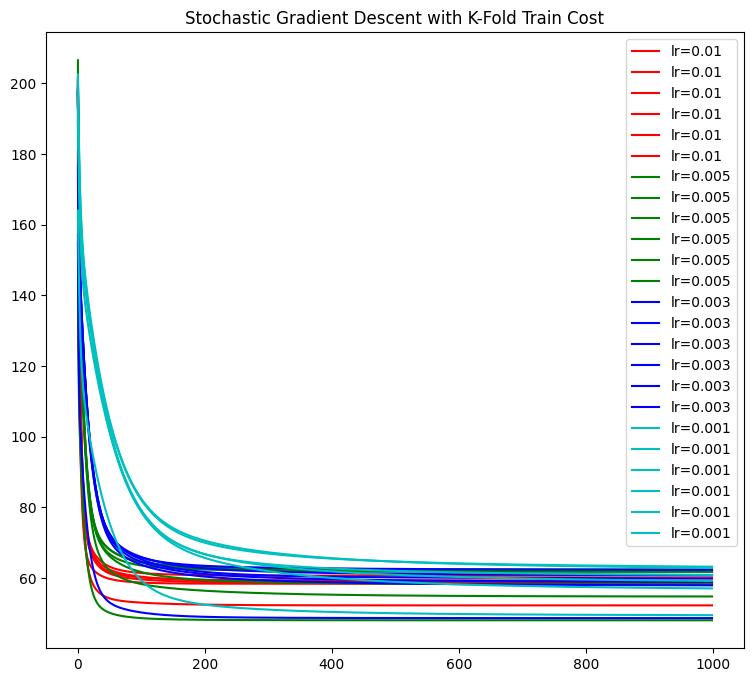

In [25]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_kfold_train_costs)):
    for j in range(len(sgd_kfold_train_costs[i])):
        plt.plot(sgd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')